In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score
import pandas as pd

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
########## Sklearn #############
# Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# Models
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.svm import SVC                             # SVC
from sklearn import tree                                # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.tree import DecisionTreeClassifier         # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.ensemble import BaggingClassifier          # Bagging
from sklearn.ensemble import VotingClassifier           # Voting
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import AdaBoostClassifier         # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # GBM - Gradient Boosting Machine
from sklearn.ensemble import ExtraTreesClassifier

                   # LightGBM | !conda install -c conda-forge lightgbm

In [ ]:
#https://h2o-release.s3.amazonaws.com/h2o/master/6591/docs-website/h2o-py/docs/_modules/h2o/estimators/stackedensemble.html
import pandas as pd

import numpy as np
import sys, os , warnings
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler,RobustScaler, PowerTransformer, normalize
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#let's load the processed file:
import pickle
data_folder  = '/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/ClassificationUsingH2O/'


In [ ]:
#check every thing is ok!
#x_train, y_train = pickle.load( open(file_path+'final_trainCICIDS2017.pkl', 'rb'))
#after sampling version
x_train, y_train = pickle.load( open(data_folder+'train_resampledCICIDS2017.pkl', 'rb'))

In [ ]:
x_train.shape, y_train.shape

((1524782, 15), (1524782,))

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_test, y_test =  pickle.load( open(data_folder+'final_testCICIDS2017.pkl', 'rb'))

In [ ]:
x_test.shape, y_test.shape

((756240, 15), (756240,))

In [ ]:
features_names = list(x_train.columns) + ['Label']

In [ ]:
[y_train.name]

['Label']

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=824155eb7ce1abf00226122fa460041acab69031f2359724e44fb487dc2db2f5
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

In [ ]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.24" 2024-07-16; OpenJDK Runtime Environment (build 11.0.24+8-post-Ubuntu-1ubuntu322.04); OpenJDK 64-Bit Server VM (build 11.0.24+8-post-Ubuntu-1ubuntu322.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4y0dx71o
  JVM stdout: /tmp/tmp4y0dx71o/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4y0dx71o/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_j45y7y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#aml = H2OAutoMLClassifier(max_models=10, seed=42, sort_metric='aucpr')

In [ ]:
def H2O_dataFormat(X_train, Y_train,X_test, Y_test):
    #get features
    target_name = Y_train.name
    features_names = list(X_train.columns) + [target_name]
    # Convert data to H2OFrame
    # Firstly, convert data to H2OFrame X_train, y_train
    X_train_h2o = h2o.H2OFrame(X_train)
    y_train_h2o = h2o.H2OFrame(Y_train.values)#Series don't work with H2O frame, so we convert X_train to numpy
    Traindata_h2o = X_train_h2o.cbind(y_train_h2o)#another sol, we can combine data frames firstly
    #set columns for Traindata_h20
    Traindata_h2o.columns = features_names
    #set the problem as a binary classification
    Traindata_h2o[target_name] = Traindata_h2o[target_name].asfactor()
    #Secondly  convert data to H2OFrame X_train, y_train
    X_test_h2o = h2o.H2OFrame(X_test.values)
    y_test_h2o = h2o.H2OFrame(Y_test.values)#Series don't work with H2O frame, so we convert X_test to numpy
    Testdata_h2o = X_test_h2o.cbind(y_test_h2o)
    #set columns for Testdata_h2o
    Testdata_h2o.columns = features_names
    #set the problem as a binary classification
    Testdata_h2o[target_name] = Testdata_h2o[target_name].asfactor()
    return Traindata_h2o,Testdata_h2o,features_names

In [ ]:
train_h2o, test_h20, cols_names  = H2O_dataFormat(x_train, y_train,x_test, y_test)#be patient it takes some time to finish

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# "DRF": Distributed Random Forest
# "GLM": Generalized Linear Model
# "GBM": Gradient Boosting Machine
# "DeepLearning": Deep Learning models
# "StackedEnsemble": Stacked Ensemble models
# "XGBoost": eXtreme Gradient Boosting (requires xgboost library)

In [ ]:
#sort_metric: Specifies the metric used to sort the Leaderboard by at the end of an AutoML run. Available options include:
# AUTO: This defaults to logloss for classification and deviance for regression.
# deviance (mean residual deviance)
# logloss
# MSE
# RMSE
# MAE
# RMSLE
# AUC (area under the ROC curve)
# AUCPR (area under the Precision-Recall curve)
# lift_top_group
# misclassification
# mean_per_class_error

In [ ]:
aml = H2OAutoML(
    max_runtime_secs=3*3600,  # Set max runtime in seconds
    #include_algos=["GBM", "StackedEnsemble","XGBoost","DRF"],  # Include only these models
    exclude_algos=[ "StackedEnsemble","GLM","XGBoost"],
    keep_cross_validation_predictions=True,
    nfolds=5,  # Use 5-fold cross-validation
    max_models= 15,##Specify the maximum number of models to build in an AutoML run, excluding the Stacked Ensemble models.
    #sort_metric="accuracy",  # Use accuracy as the metric for selecting the best model
    seed=1,
    verbosity =  "info"
)

In [ ]:
aml.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)

AutoML progress: |
13:02:36.923: Project: AutoML_1_20241001_130236
13:02:36.925: Setting stopping tolerance adaptively based on the training frame: 0.001
13:02:36.925: Build control seed: 1
13:02:36.928: training frame: Frame key: AutoML_1_20241001_130236_training_py_3_sid_b8f9    cols: 16    rows: 1524782  chunks: 62    size: 92018833  checksum: 5746287170532971316
13:02:36.929: validation frame: NULL
13:02:36.929: leaderboard frame: NULL
13:02:36.929: blending frame: NULL
13:02:36.929: response column: Label
13:02:36.929: fold column: null
13:02:36.929: weights column: null
13:02:36.967: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g, 30w

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20241001_130236


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    114                114                         1.2161e+06             0            15           11.5789       1             1555          843.772

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00047125446045442627
RMSE: 0.021708396082033014
LogLoss: 0.0025962315599278754
Mean Per-Class Error: 0.00045445618162543084
AUC: 0.9999984949441328
AUCPR: 0.9999984869424798
Gini: 0.9999969898882657

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6023744624896019
       0       1       Error    Rate
-----  ------  ------  -------  -----------------
0      761708  294     0.0004   (294.0/762002.0)
1      399     762381  0.0005   (399.0/762780.0)
Total  762107  762675  0.0005   (693.0/1524782.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.602374     0.999546  185
max f2                       0.398918     0.99967   225
max f0point5                 0.761069     0.999689  154
max accuracy                 0.602374     0.999546  185
max precision                0.999897     1         0
max recall                   0.0242707    1         358
max specificity              0.999897     1         0
max absolute_mcc             0.602374     0.999091  185
max min_per_class_accuracy   0.573421     0.999531  190
max mean_per_class_accuracy  0.602374     0.999546  185
max tns                      0.999897     762002    0
max fns                      0.999897     349331    0
max fps                      0.000108381  762002    399
max tps                      0.0242707    762780    358
max tnr                      0.999897     1         0
max fnr                      0.999897     0.457971  0
max fpr                      0.000108381  1         399
max tpr                      0.0242707    1         358

Gains/Lift Table: Avg response rate: 50.03 %, avg score: 50.03 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0114108                   0.999907           1.99898     1.99898            1                0.999907     1                           0.999907            0.02281         0.02281                    99.898    99.898             0.02281
2        0.0222609                   0.999907           1.99898     1.99898            1                0.999907     1                           0.999907            0.0216891       0.0444991                  99.898    99.898             0.0444991
3        0.0373496                   0.999907           1.99898     1.99898            1                0.999907     1                           0.999907            0.030162        0.0746611                  99.898    99.898             0.0746611
4        0.0473327                   0.999907           1.99898     1.99898            1                0.999907     1                           0.999907            0.019956        0.0946171                  99.898    99.898             0.0946171
5        0.053605                    0.999907           1.99898     1.99898       

In [ ]:
# save the model
path = data_folder +"/aml_model"
# Get the leader model
leader_model = aml.leader
model_path = h2o.save_model(model=leader_model, path=path, force=True)

In [ ]:
model_path

'/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/ClassificationUsingH2O/aml_model/GBM_1_AutoML_1_20241001_130236'

In [ ]:
# load the model
#you can run from this point again
loaded_leaderModel = h2o.load_model(model_path) # Load using the returned model_path from h2o.save_model



In [ ]:
#use loaded model:
preds = loaded_leaderModel.predict(test_h20)
print(preds)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict           p0           p1
        0  0.99978      0.000220357
        1  0.000117933  0.999882
        1  0.00110504   0.998895
        0  0.999822     0.000178114
        0  0.999891     0.000108641
        0  0.985061     0.0149386
        0  0.999852     0.000148295
        0  0.999891     0.000108641
        0  0.999845     0.000155155
        1  0.000102117  0.999898
[756240 rows x 3 columns]



In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
# Convert predictions and actual values to Pandas
preds_df = preds.as_data_frame()
actual_df = test_h20["Label"].as_data_frame()

# Calculate the accuracy using scikit-learn
accuracy = accuracy_score(actual_df, preds_df['predict'])
print(f"Accuracy: {accuracy:.10f}")
print(classification_report(actual_df, preds_df['predict']))

Accuracy: 0.9975298847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628518
           1       0.99      1.00      0.99    127722

    accuracy                           1.00    756240
   macro avg       0.99      1.00      1.00    756240
weighted avg       1.00      1.00      1.00    756240



In [ ]:
# Convert predictions and actual values to Pandas
preds_df = preds.as_data_frame()
actual_df = test_h20["Label"].as_data_frame()

# Get the classification report as a dictionary
report = classification_report(actual_df, preds_df['predict'], output_dict=True)
print(type(report))
# Print the report with desired formatting
for label, metrics in report.items():
  if label not in ['accuracy', 'macro avg', 'weighted avg']: # Check if the label is not one of the special cases
    print(f"Label: {label}")
    for metric, value in metrics.items():
      print(f"  {metric}: {value:.10f}")
  else:
    # Print the values for special cases which are floats
    print(f"{label}:")
    print(f"  {metrics:.10f}") # Directly print the float value

<class 'dict'>
Label: 0
  precision: 0.9993991113
  recall: 0.9976277529
  f1-score: 0.9985126465
  support: 628518.0000000000
Label: 1
  precision: 0.9884271477
  recall: 0.9970482767
  f1-score: 0.9927189953
  support: 127722.0000000000
accuracy:
  0.9975298847
macro avg:


TypeError: unsupported format string passed to dict.__format__

In [ ]:
# Convert predictions and actual values to Pandas
preds_df = preds.as_data_frame()
actual_df = test_h20["Label"].as_data_frame()

# Get the classification report as a dictionary
report = classification_report(actual_df, preds_df['predict'], output_dict=True)
print(type(report))
print(report)

<class 'dict'>
{'0': {'precision': 0.9993991112584555, 'recall': 0.9976277529044514, 'f1-score': 0.9985126464860079, 'support': 628518.0}, '1': {'precision': 0.988427147691639, 'recall': 0.9970482767260143, 'f1-score': 0.9927189953148996, 'support': 127722.0}, 'accuracy': 0.9975298846926901, 'macro avg': {'precision': 0.9939131294750472, 'recall': 0.9973380148152329, 'f1-score': 0.9956158209004538, 'support': 756240.0}, 'weighted avg': {'precision': 0.9975460472434855, 'recall': 0.9975298846926901, 'f1-score': 0.9975341519407891, 'support': 756240.0}}


In [ ]:
from prettytable import PrettyTable

In [ ]:
# Create a PrettyTable instance
table = PrettyTable()

# Add columns to the table
table.field_names = ["Label", "Metric", "Value"]

# Add columns to the table
table.field_names = ["Label", "Metric", "Value"]

# Iterate through the dictionary and add rows to the table
for label, metrics in report.items():
  if label not in ['accuracy', 'macro avg', 'weighted avg']:
    for metric, value in metrics.items():
      table.add_row([label, metric, f"{value:.10f}"])
  else:
    # Access the value within the nested dictionary for special cases
    if label == 'accuracy': # Accuracy is just a single float, not a dictionary
        table.add_row([label, "", f"{metrics:.10f}"]) # So we can format it directly
    else:
        for metric, value in metrics.items(): # For macro/weighted avg, we need to iterate through the dict
            table.add_row([label, metric, f"{value:.10f}"])

# Print the table
print(table)

+--------------+-----------+-------------------+
|    Label     |   Metric  |       Value       |
+--------------+-----------+-------------------+
|      0       | precision |    0.9993991113   |
|      0       |   recall  |    0.9976277529   |
|      0       |  f1-score |    0.9985126465   |
|      0       |  support  | 628518.0000000000 |
|      1       | precision |    0.9884271477   |
|      1       |   recall  |    0.9970482767   |
|      1       |  f1-score |    0.9927189953   |
|      1       |  support  | 127722.0000000000 |
|   accuracy   |           |    0.9975298847   |
|  macro avg   | precision |    0.9939131295   |
|  macro avg   |   recall  |    0.9973380148   |
|  macro avg   |  f1-score |    0.9956158209   |
|  macro avg   |  support  | 756240.0000000000 |
| weighted avg | precision |    0.9975460472   |
| weighted avg |   recall  |    0.9975298847   |
| weighted avg |  f1-score |    0.9975341519   |
| weighted avg |  support  | 756240.0000000000 |
+--------------+----

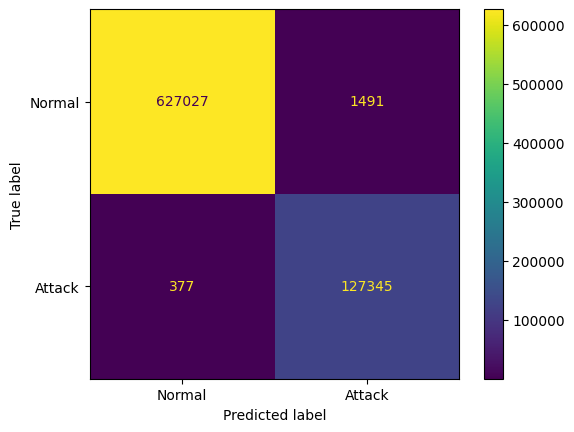

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions and actual values to Pandas
preds_df = preds.as_data_frame()
actual_df = test_h20["Label"].as_data_frame()

# Calculate the confusion matrix
cm = confusion_matrix(actual_df, preds_df['predict'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot()
plt.show()

In [ ]:
# Evaluate model performance
perf = loaded_leaderModel.model_performance(test_h20)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0023197730136957423
RMSE: 0.048164021984212886
LogLoss: 0.010307932732321572
Mean Per-Class Error: 0.002853363929913296
AUC: 0.9998782450966096
AUCPR: 0.999433609510098
Gini: 0.9997564901932192

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7881571825454531
       0       1       Error    Rate
-----  ------  ------  -------  -----------------
0      627436  1082    0.0017   (1082.0/628518.0)
1      509     127213  0.004    (509.0/127722.0)
Total  627945  128295  0.0021   (1591.0/756240.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.788157     0.993786  103
max f2                       0.69225      0.995407  126
max f0point5                 0.959327     0.993521  44
max accuracy                 0.788157     0.997896  103
max precision                0.9

In [ ]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = loaded_leaderModel.explain(test_h20,include_explanations=["confusion_matrix"])

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_1_20241001_130236

,0,1,Error,Rate
0,627436.0,1082.0,0.0017,(1082.0/628518.0)
1,509.0,127213.0,0.004,(509.0/127722.0)
Total,627945.0,128295.0,0.0021,(1591.0/756240.0)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


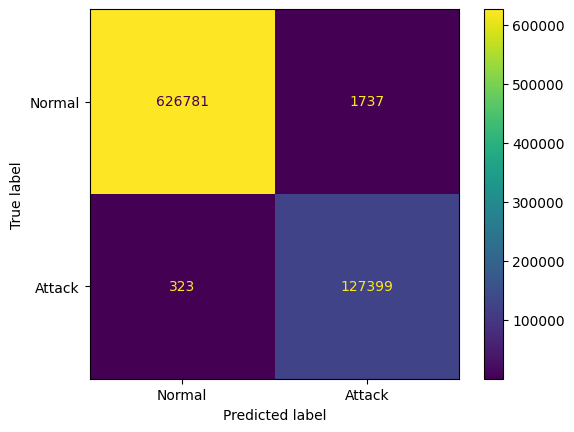

In [ ]:
# Get prediction probabilities
preds = loaded_leaderModel.predict(test_h20)
preds_df = preds.as_data_frame()

# Set threshold to 0.5
threshold = 0.5
preds_df['predicted'] = (preds_df['p1'] >= threshold).astype(int)

# Get true labels
actual_df =test_h20['Label'].as_data_frame()

# Calculate confusion matrix using scikit-learn
cm = confusion_matrix(actual_df, preds_df['predicted'])
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot()
plt.show()

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_2_20240930_132347

,0,1,Error,Rate
0,627508.0,1010.0,0.0016,(1010.0/628518.0)
1,472.0,127250.0,0.0037,(472.0/127722.0)
Total,627980.0,128260.0,0.002,(1482.0/756240.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

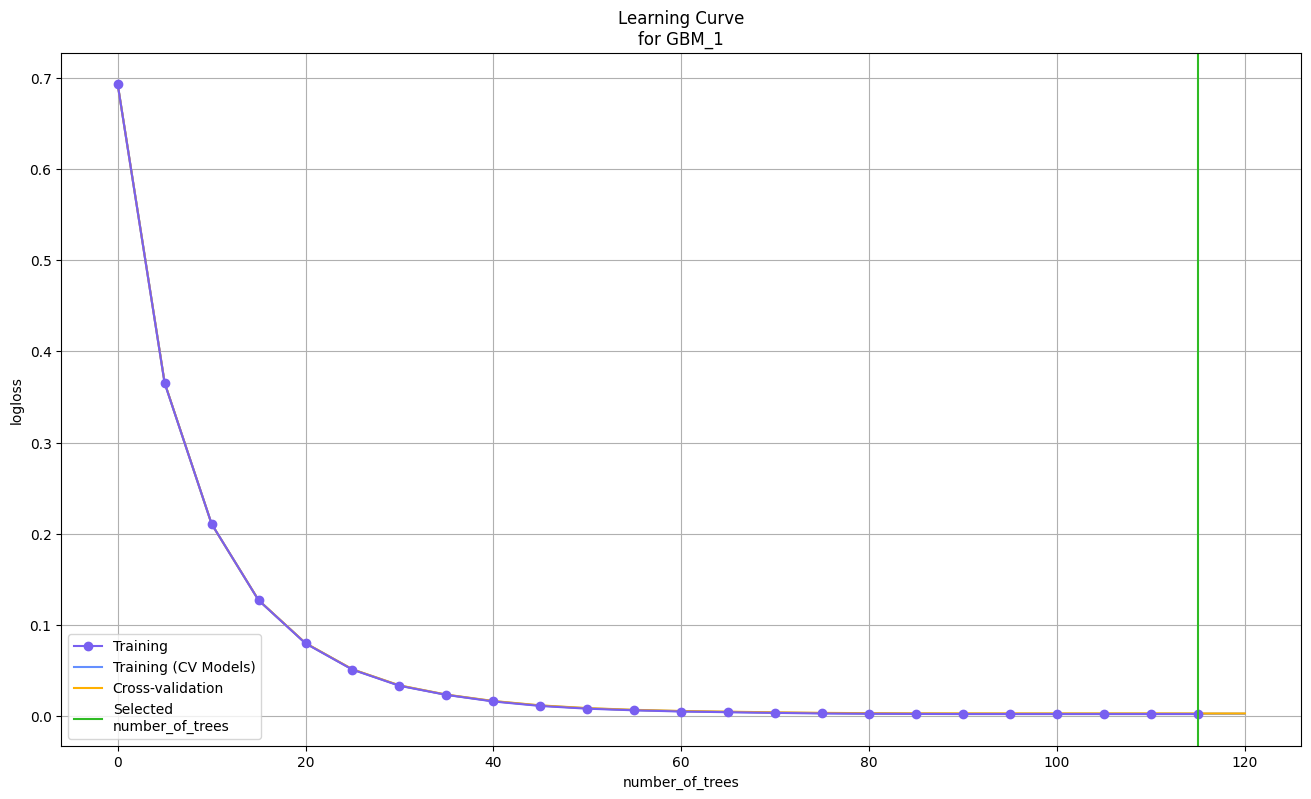

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

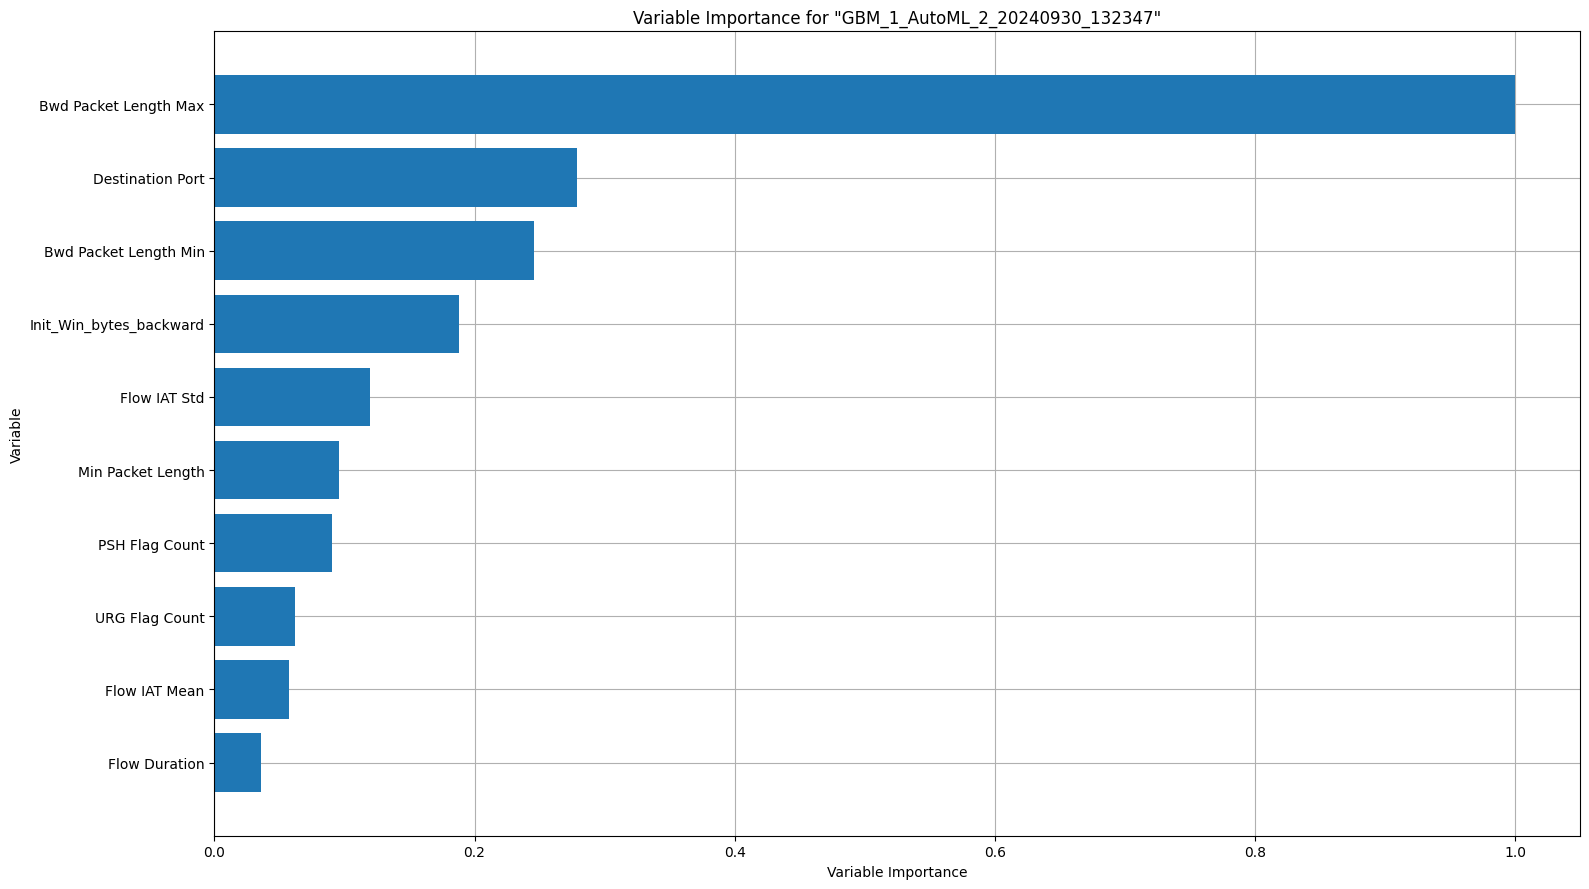

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_af17bcae8ae5ad31c982a82bd72a4bd6> was cancelled by the user.

<Figure size 1600x900 with 0 Axes>

In [ ]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test_h20,exclude_explanations=["shap_summary"])

In [ ]:
#the same thing for loaded model
loaded_leaderModel.explain(test_h20,exclude_explanations=["shap_summary"])

In [ ]:
# Extract accuracy at the default threshold (0.5)
accuracy_at_default_threshold = perf.accuracy(thresholds=[0.5])[0][1]  # First element contains the accuracy at threshold 0.5
print(f"Accuracy at default threshold (0.5): {accuracy_at_default_threshold}")
 #0.9979781550830424

Could not find exact threshold 0.5; using closest threshold found 0.5008053287637254.
Accuracy at default threshold (0.5): 0.9972720300433725


In [ ]:
# Predict on test set
preds = aml.predict(test_h20)
print(preds)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict           p0           p1
        0  0.99978      0.000220357
        1  0.000117933  0.999882
        1  0.00110504   0.998895
        0  0.999822     0.000178114
        0  0.999891     0.000108641
        0  0.985061     0.0149386
        0  0.999852     0.000148295
        0  0.999891     0.000108641
        0  0.999845     0.000155155
        1  0.000102117  0.999898
[756240 rows x 3 columns]



In [ ]:
lb = aml.leaderboard

In [ ]:
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20241001_130236,0.999996,0.00308895,0.999996,0.000589519,0.0245895,0.000604643
GBM_4_AutoML_1_20241001_130236,0.999992,0.00566663,0.999992,0.000684605,0.0320147,0.00102494
GBM_3_AutoML_1_20241001_130236,0.999978,0.0094501,0.999978,0.00149799,0.0439486,0.00193148
GBM_2_AutoML_1_20241001_130236,0.999949,0.0141497,0.999947,0.00289477,0.0566354,0.00320757
DRF_1_AutoML_1_20241001_130236,0.999878,0.0256885,0.999879,0.00509266,0.0768867,0.00591157
XRT_1_AutoML_1_20241001_130236,0.99902,0.131013,0.998979,0.00895608,0.156373,0.0244525


In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20241001_130236,0.999996,0.00308895,0.999996,0.000589519,0.0245895,0.000604643
GBM_4_AutoML_1_20241001_130236,0.999992,0.00566663,0.999992,0.000684605,0.0320147,0.00102494
GBM_3_AutoML_1_20241001_130236,0.999978,0.0094501,0.999978,0.00149799,0.0439486,0.00193148
GBM_2_AutoML_1_20241001_130236,0.999949,0.0141497,0.999947,0.00289477,0.0566354,0.00320757
DRF_1_AutoML_1_20241001_130236,0.999878,0.0256885,0.999879,0.00509266,0.0768867,0.00591157
XRT_1_AutoML_1_20241001_130236,0.99902,0.131013,0.998979,0.00895608,0.156373,0.0244525


In [ ]:
#we need the four best models:
# Extract the top 4 models from the leaderboard
top_4_models = list(lb.as_data_frame(use_multi_thread=True)["model_id"][:4])
print("Top 4 Models:", top_4_models)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Top 4 Models: ['GBM_1_AutoML_1_20241001_130236', 'GBM_4_AutoML_1_20241001_130236', 'GBM_3_AutoML_1_20241001_130236', 'GBM_2_AutoML_1_20241001_130236']


In [ ]:
from h2o.estimators import H2OStackedEnsembleEstimator

In [ ]:
# Create a stacked ensemble using the selected top 4 models
stacked_ensemble_GBM = H2OStackedEnsembleEstimator(model_id="ensemble",
    metalearner_algorithm='GBM',  # or specify a metalearner like 'GLM', 'GBM'
    base_models=top_4_models ,#base_models
    training_frame=train_h2o,#etalearner_algorithm
    response_column="Label"
)

In [ ]:

stacked_ensemble_GBM.train(x=cols_names[:-1], y=cols_names[-1], training_frame=train_h2o)


stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: ensemble


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/4
# GBM base models (used / total)      4/4
Metalearner algorithm                 GBM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.00017559870726367583
RMSE: 0.0132513662413985
LogLoss: 0.003953576205093863
Mean Per-Class Error: 9.932459276916965e-05
AUC: 0.9999999197863171
AUCPR: 0.9999999184745235
Gini: 0.9999998395726342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1904063800015901
       0     1     Error    Rate
-----  ----  ----  -------  ------------
0      5033  1     0.0002   (1.0/5034.0)
1      0     4953  0        (0.0/4953.0)
Total  5033  4954  0.0001   (1.0/9987.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.190406     0.999899   75
max f2                       0.190406     0.99996    75
max f0point5                 0.697922     0.999919   72
max accuracy                 0.190406     0.9999     75
max precision                0.996662     1          0
max recall                   0.190406     1          75
max specificity              0.996662     1          0
max absolute_mcc             0.190406     0.9998     75
max min_per_class_accuracy   0.190406     0.999801   75
max mean_per_class_accuracy  0.190406     0.999901   75
max tns                      0.996662     5034       0
max fns                      0.996662     379        0
max fps                      0.00334247   5034       124
max tps                      0.190406     4953       75
max tnr                      0.996662     1          0
max fnr                      0.996662     0.0765193  0
max fpr                      0.00334247   1          124
max tpr                      0.190406     1          75

Gains/Lift Table: Avg response rate: 49.59 %, avg score: 49.58 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.457995                    0.996662           2.01635  2.01635            1                0.996662    1                           0.996662            0.923481        0.923481                   101.635  101.635            0.923481
2        0.500551                    0.00420137         1.79811  1.9978             0.891765         0.88572     0.990798                    0.98723             0.0765193       1                          79.8113  99.78              0.990862
3        1                           0.00334247         0        1                  0                0.00334647  0.495945                    0.49583             0               1                          -100     0                  0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
stacked_ensemble_GBM

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: ensemble


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/4
# GBM base models (used / total)      4/4
Metalearner algorithm                 GBM
Metalearner fold assignment scheme    AUTO
Metalearner nfolds                    0
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.00017559870726367583
RMSE: 0.0132513662413985
LogLoss: 0.003953576205093863
Mean Per-Class Error: 9.932459276916965e-05
AUC: 0.9999999197863171
AUCPR: 0.9999999184745235
Gini: 0.9999998395726342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1904063800015901
       0     1     Error    Rate
-----  ----  ----  -------  ------------
0      5033  1     0.0002   (1.0/5034.0)
1      0     4953  0        (0.0/4953.0)
Total  5033  4954  0.0001   (1.0/9987.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.190406     0.999899   75
max f2                       0.190406     0.99996    75
max f0point5                 0.697922     0.999919   72
max accuracy                 0.190406     0.9999     75
max precision                0.996662     1          0
max recall                   0.190406     1          75
max specificity              0.996662     1          0
max absolute_mcc             0.190406     0.9998     75
max min_per_class_accuracy   0.190406     0.999801   75
max mean_per_class_accuracy  0.190406     0.999901   75
max tns                      0.996662     5034       0
max fns                      0.996662     379        0
max fps                      0.00334247   5034       124
max tps                      0.190406     4953       75
max tnr                      0.996662     1          0
max fnr                      0.996662     0.0765193  0
max fpr                      0.00334247   1          124
max tpr                      0.190406     1          75

Gains/Lift Table: Avg response rate: 49.59 %, avg score: 49.58 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.457995                    0.996662           2.01635  2.01635            1                0.996662    1                           0.996662            0.923481        0.923481                   101.635  101.635            0.923481
2        0.500551                    0.00420137         1.79811  1.9978             0.891765         0.88572     0.990798                    0.98723             0.0765193       1                          79.8113  99.78              0.990862
3        1                           0.00334247         0        1                  0                0.00334647  0.495945                    0.49583             0               1                          -100     0                  0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:

# save the model
path = data_folder +"/stacked_ensmble_GBM__aml_model"
# Get the leader model
stacked_ensmble_GBM_leader_model = stacked_ensemble_GBM
model_path = h2o.save_model(model=stacked_ensmble_GBM_leader_model , path=path, force=True)

# load the model
#you can run from this point again
stacked_ensmble_GBM_leader_model = h2o.load_model(model_path) # Load using the returned model_path from h2o.save_model

In [ ]:
model_path

'/content/drive/MyDrive/IntrusionDetectionSystem/CICIDS2017_Classification/ClassificationUsingH2O/stacked_ensmble_GBM__aml_model/ensemble'

In [ ]:
#use loaded model:
preds = stacked_ensmble_GBM_leader_model.predict(test_h20)
print(preds)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict          p0          p1
        0  0.996658    0.00334247
        1  0.00333802  0.996662
        1  0.00333802  0.996662
        0  0.996658    0.00334247
        0  0.996658    0.00334247
        0  0.996429    0.00357084
        0  0.996658    0.00334247
        0  0.996658    0.00334247
        0  0.996658    0.00334247
        1  0.00333802  0.996662
[756240 rows x 3 columns]



In [ ]:
# Convert predictions and actual values to Pandas
preds_df = preds.as_data_frame()
actual_df = test_h20["Label"].as_data_frame()

# Calculate the accuracy using scikit-learn
accuracy = accuracy_score(actual_df, preds_df['predict'])
print(f"Accuracy: {accuracy:.10f}")
print(classification_report(actual_df, preds_df['predict']))

Accuracy: 0.9976171586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628518
           1       0.99      1.00      0.99    127722

    accuracy                           1.00    756240
   macro avg       0.99      1.00      1.00    756240
weighted avg       1.00      1.00      1.00    756240



stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


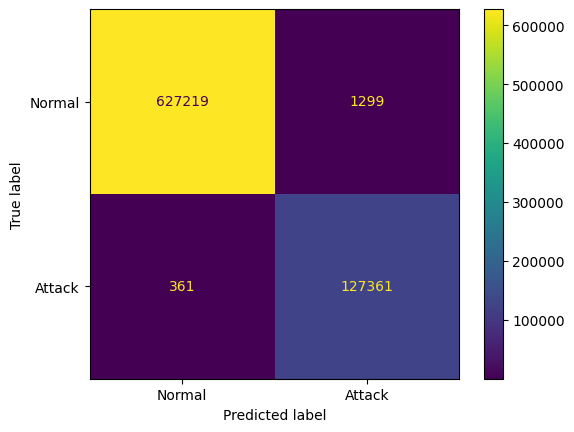

In [ ]:
# Get prediction probabilities stacked_ensmble_GBM_leader_model
preds = stacked_ensmble_GBM_leader_model.predict(test_h20)
preds_df = preds.as_data_frame()

# Set threshold to 0.5
threshold = 0.5
preds_df['predicted'] = (preds_df['p1'] >= threshold).astype(int)

# Get true labels
actual_df =test_h20['Label'].as_data_frame()

# Calculate confusion matrix using scikit-learn
cm = confusion_matrix(actual_df, preds_df['predicted'])
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot()
plt.show()

In [ ]:
# Evaluate model performance
perf = stacked_ensmble_GBM_leader_model.model_performance(test_h20)
print(perf)

ModelMetricsBinomial: stackedensemble
** Reported on test data. **

MSE: 0.0019936855772539853
RMSE: 0.04465070634664121
LogLoss: 0.012215246934168325
Mean Per-Class Error: 0.0029305058865192325
AUC: 0.9996477530164167
AUCPR: 0.9974875916004576
Gini: 0.9992955060328335

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9434867199562846
       0       1       Error    Rate
-----  ------  ------  -------  -----------------
0      627590  928     0.0015   (928.0/628518.0)
1      560     127162  0.0044   (560.0/127722.0)
Total  628150  128090  0.002    (1488.0/756240.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value      idx
---------------------------  -----------  ---------  -----
max f1                       0.943487     0.994183   42
max f2                       0.389754     0.99576    192
max f0point5                 0.988521     0.994282   15
max accuracy                 0.943487     0.998032   42
max precision   

In [ ]:
# Extract accuracy at the default threshold (0.5)
accuracy_at_default_threshold = perf.accuracy(thresholds=[0.5])[0][1]  # First element contains the accuracy at threshold 0.5
print(f"Accuracy at default threshold (0.5): {accuracy_at_default_threshold}")

Could not find exact threshold 0.5; using closest threshold found 0.49784480804391773.
Accuracy at default threshold (0.5): 0.9978036073204274


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## ensemble

,0,1,Error,Rate
0,627590.0,928.0,0.0015,(928.0/628518.0)
1,560.0,127162.0,0.0044,(560.0/127722.0)
Total,628150.0,128090.0,0.002,(1488.0/756240.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

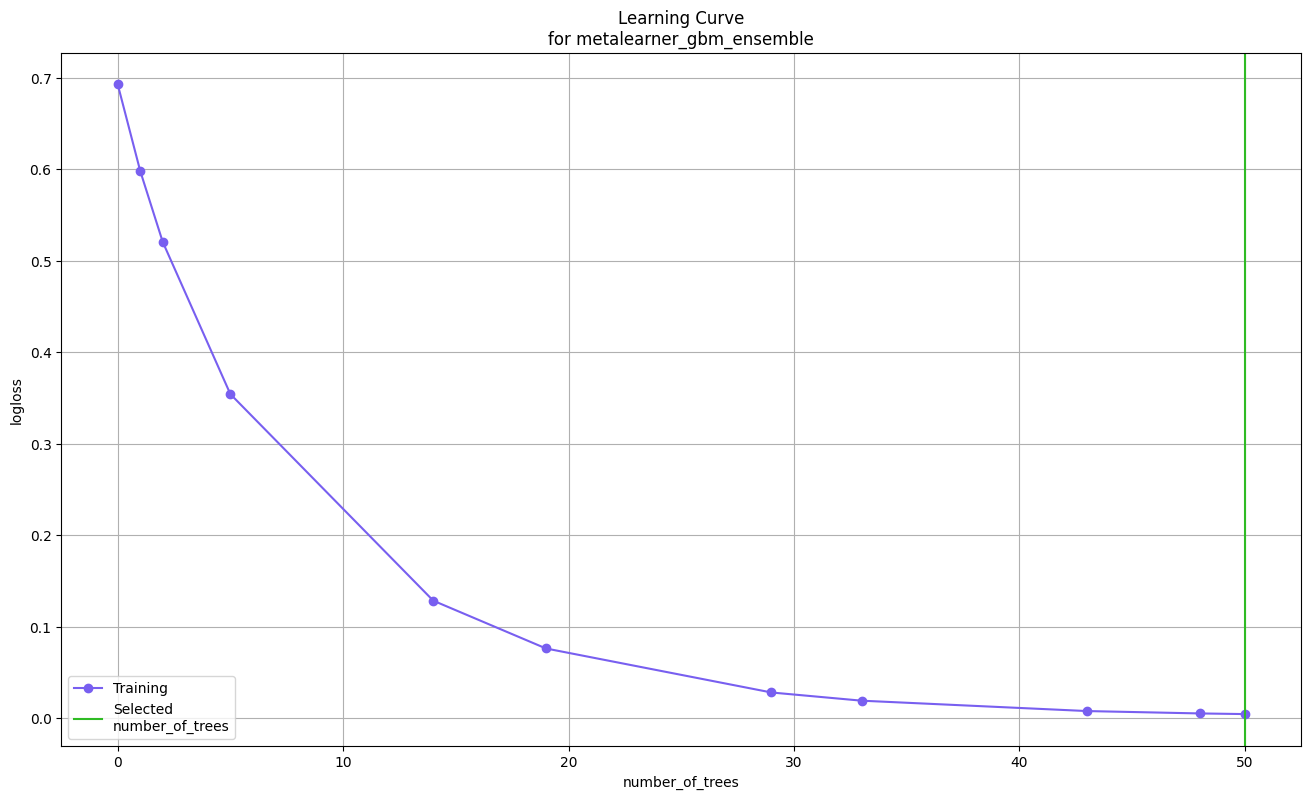

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_a7c5830296faeeb28d3c1096101e434d> was cancelled by the user.

<Figure size 1600x900 with 0 Axes>

In [ ]:
# Explain a single H2O model (e.g. leader model from AutoML)
exm =stacked_ensmble_GBM_leader_model.explain(test_h20,exclude_explanations=["shap_summary"])

In [ ]:
#Get the base models
base_models = stacked_ensmble_GBM_leader_model.base_models

# Get the metalearner
metalearner = stacked_ensmble_GBM_leader_model.metalearner

# Print the base models and metalearner
print("Base models:", base_models)
print("Metalearner:", metalearner)

Base models: ['GBM_1_AutoML_1_20241001_130236', 'GBM_4_AutoML_1_20241001_130236', 'GBM_3_AutoML_1_20241001_130236', 'GBM_2_AutoML_1_20241001_130236']
Metalearner: <bound method H2OStackedEnsembleEstimator.metalearner of H2OStackedEnsembleEstimator({'parms': {'model_id': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'model_id', 'label': 'model_id', 'help': 'Destination id for this model; auto-generated if not specified.', 'required': False, 'type': 'Key<Model>', 'default_value': None, 'actual_value': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'ensemble', 'type': 'Key<Model>', 'URL': '/3/Models/ensemble'}, 'input_value': None, 'level': 'critical', 'values': [], 'is_member_of_frames': [], 'is_mutually_exclusive_with': [], 'gridable': False}, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'ModelParameterSchemaV3', 'schema_type': 'Iced'}, 'name': 'training_